Checkpoint loaded from nnue_ep_0120.pt, no optimizer


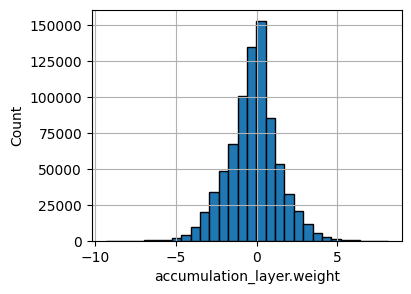

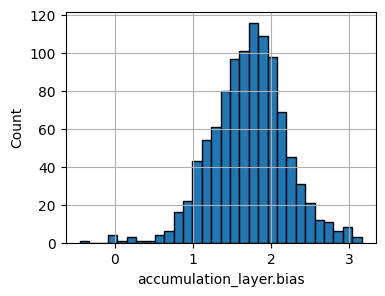

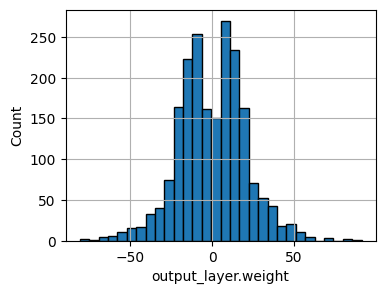

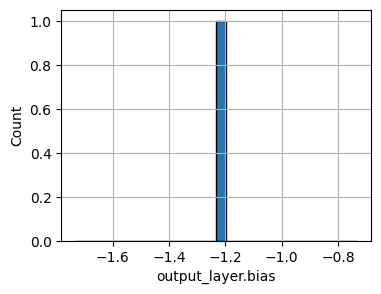

In [29]:
from model import NNUE, load_checkpoint
import matplotlib.pyplot as plt
import numpy as np

nnue = NNUE()
model_path = "nnue_ep_0120.pt"
load_checkpoint(model_path, nnue)

value_sets = []

# QA = 255

for name, param in nnue.named_parameters():
    weights_data = param.data.numpy().flatten()
    # weights_data *= QA
    # weights_data = weights_data.astype(np.int32)
    value_sets.append((name, weights_data))

for name, values in value_sets:
    plt.figure(figsize=(4, 3))
    plt.hist(values, bins=30, edgecolor='black')
    plt.xlabel(name)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


In [ ]:

def get_layer_values(layer_name):
    for name, param in nnue.named_parameters():
        if name == layer_name:
            return param.data.numpy().flatten()
    raise "Could not find layer"

x = get_layer_values("accumulation_layer.weight")

2**16 / np.sum(np.flip(np.sort(np.absolute(x)))[0:32])

# 259.1133 is highest safe value for QA


np.float32(259.1133)